# Dataset, DataLoader

dataset은 data와 label을 저장하고 있고, dataloader는 저장된 dataset을 가져와서 model에서 사용할 수 있도록, iterable로 만든다.

In [1]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Lambda, Compose

In [2]:
training_data = datasets.FashionMNIST(
    root = "data", ## 저장할 경로
    train = True, ## training set
    download = True, ## download 받을 것이다.
    transform = ToTensor() ## 전처리. ToTensor는 tensor로 바꿔주면서 0~1 scaling을 자동으로 해준다.
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [3]:
print(training_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [4]:
print(training_data[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000

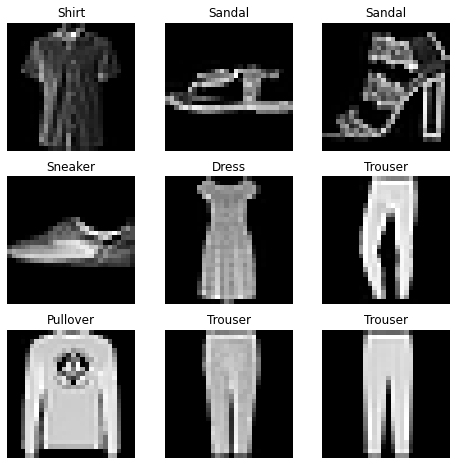

In [5]:
labels_map = {
    0 : "T-shirt",
    1 : "Trouser",
    2 : "Pullover",
    3 : "Dress",
    4 : "Coat",
    5 : "Sandal",
    6 : "Shirt",
    7 : "Sneaker",
    8 : "Bag",
    9 : "Ankle Boot"
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1, )).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Feature batch shape : torch.Size([64, 1, 28, 28])
Labels batch shape : torch.Size([64])


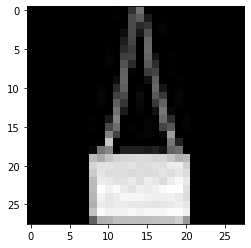

Label : 8


In [6]:
## DataLoader
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape : {train_features.size()}") ## train_feautres.shape과 동일.
print(f"Labels batch shape : {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label : {label}")

In [7]:
import numpy as np
from torchvision import transforms as tr
## Custom Dataset

class CustomDataset(Dataset):
    def __init__(self, np_data, transform=None):
        self.data = np_data
        self.transform = transform
        self.len = np_data.shape[0]

    def __len__(self): ## 필수
        return self.len

    def __getitem__(self, idx): ## 필수
        sample = self.data[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample

In [8]:
def square(sample):
    return sample ** 2

In [9]:
custom_transform = tr.Compose([square])

np_data = np.arange(10)
custom_dataset = CustomDataset(np_data, transform=custom_transform)
custom_dataloader = DataLoader(custom_dataset, batch_size=1, shuffle=True)

for _ in range(3):
    for data in custom_dataloader:
        print(data)
    print("=" * 20)

tensor([25])
tensor([4])
tensor([0])
tensor([9])
tensor([81])
tensor([49])
tensor([64])
tensor([1])
tensor([16])
tensor([36])
tensor([25])
tensor([49])
tensor([81])
tensor([16])
tensor([0])
tensor([36])
tensor([64])
tensor([9])
tensor([4])
tensor([1])
tensor([16])
tensor([0])
tensor([36])
tensor([81])
tensor([4])
tensor([64])
tensor([1])
tensor([9])
tensor([25])
tensor([49])


# Model

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device}")

Using cuda


In [11]:
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 128), ## Dense layer
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 10)

            ## softmax를 써주지 않은 이유는 loss 구할 때 적용하기 때문.
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [12]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


# Training / Validation

In [13]:
loss_fn = nn.CrossEntropyLoss()

learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) ## optimizer는 weight와 bias를 업데이트 시켜준다.

In [14]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    ## Epoch별로 batch-size단위로 dataset을 순회한다.
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        ## loss 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        ## backpropagation
        optimizer.zero_grad() ## optimizer의 gradient를 비운다.(clean up)
        loss.backward() ## backpropagation
        optimizer.step() ## optimizer의 1스텝 -> weight, bias update

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss : {loss:>7f} [{current:>5d} / {size : 5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader) ## dataset 양을 batch-size로 나눈 값.
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item() ## item은 torch tensor 중 0차원(scalar)인 것의 값을 추출.

    test_loss /= num_batches
    correct /= size
    print(f"Test Error : \n Accuracy : {(100 * correct):>0.1f}%, Avg loss : {test_loss:>8f} \n")

In [15]:
epochs = 10

for epoch in range(epochs):
    print(f"Epoch {epoch + 1} \n ---------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)

print("Finished")

Epoch 1 
 ---------------------------------
loss : 2.307420 [    0 /  60000]
loss : 0.557592 [ 6400 /  60000]
loss : 0.768125 [12800 /  60000]
loss : 0.637157 [19200 /  60000]
loss : 0.545514 [25600 /  60000]
loss : 0.535236 [32000 /  60000]
loss : 0.484894 [38400 /  60000]
loss : 0.648804 [44800 /  60000]
loss : 0.460752 [51200 /  60000]
loss : 0.509413 [57600 /  60000]
Test Error : 
 Accuracy : 82.7%, Avg loss : 0.482426 

Epoch 2 
 ---------------------------------
loss : 0.455434 [    0 /  60000]
loss : 0.464994 [ 6400 /  60000]
loss : 0.526773 [12800 /  60000]
loss : 0.463969 [19200 /  60000]
loss : 0.402545 [25600 /  60000]
loss : 0.358383 [32000 /  60000]
loss : 0.331281 [38400 /  60000]
loss : 0.311855 [44800 /  60000]
loss : 0.300971 [51200 /  60000]
loss : 0.498989 [57600 /  60000]
Test Error : 
 Accuracy : 84.6%, Avg loss : 0.422309 

Epoch 3 
 ---------------------------------
loss : 0.549498 [    0 /  60000]
loss : 0.301363 [ 6400 /  60000]
loss : 0.362652 [12800 /  60000]

# SAVE

In [16]:
torch.save(model.state_dict(), "model_weights.pth") ## parameter save(weight만 저장) - state_dict 포맷으로 파라미터를 저장.

model2 = NeuralNetwork().to(device) ## 새로운 Model instance를 만들고 load weights.
model2.load_state_dict(torch.load("model_weights.pth")) ## load_state_dict
model2.eval()
test_loop(test_dataloader, model2, loss_fn)

Test Error : 
 Accuracy : 87.9%, Avg loss : 0.335028 



In [17]:
torch.save(model, "model.pth") ## 전체 model을 저장.

model3 = torch.load("model.pth") ## load
test_loop(test_dataloader, model3, loss_fn)

Test Error : 
 Accuracy : 87.1%, Avg loss : 0.359024 

